In [ ]:
# Importing Basic required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Checking for the null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Create a Separate Category for Missing 'CustomerID':
df['CustomerID'].fillna('Unknown', inplace = True)

In [ ]:
# Drop null values from Description
df.dropna(subset=['Description'], inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Check for the duplicates
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Convert Invoice date into Datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.7+ MB


In [ ]:
# Create new feature
df["Total Spendings"] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Spendings
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Checking which country has most number of customer and we came to a conclusion that UK has the most number of spendings and customer
df['Country'].value_counts()

United Kingdom          488846
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [ ]:
## Checking the most purchased product
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: Description, Length: 4223, dtype: int64

In [ ]:
# checking which customer spend highest amount of money
df1 = df.loc[df['Total Spendings'].idxmax(), "CustomerID"]

print(f"Customer with ID no. {df1} has the highest spending of {df['Total Spendings'].idxmax()}")

Customer with ID no. 16446.0 has the highest spending of 540421


In [ ]:
## Vizualization
# df.hist(figsize= (10, 6))
# plt.show()

In [ ]:
# df.corr()

In [ ]:
# Data Preparation for Clustering

In [ ]:
# Converting CustomerID into float datatype
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors= 'coerce')

In [ ]:
features = ["CustomerID" ,"Quantity", "UnitPrice", "Total Spendings"]

new_df = df[features]

In [ ]:
new_df

,CustomerID,Quantity,UnitPrice,Total Spendings
0,17850.0,6,2.55,15.30
1,17850.0,6,3.39,20.34
2,17850.0,8,2.75,22.00
3,17850.0,6,3.39,20.34
4,17850.0,6,3.39,20.34
...,...,...,...,...
541904,12680.0,12,0.85,10.20
541905,12680.0,6,2.10,12.60
541906,12680.0,4,4.15,16.60
541907,12680.0,4,4.15,16.60


In [ ]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)
df_scaled

array([[ 1.49873585, -0.01676076, -0.02151952, -0.00753755],
       [ 1.49873585, -0.01676076, -0.01289216,  0.00568484],
       [ 1.49873585, -0.0076308 , -0.01946538,  0.01003984],
       ...,
       [-1.51759324, -0.02589073, -0.00508646, -0.00412701],
       [-1.51759324, -0.02589073, -0.00508646, -0.00412701],
       [-1.51759324, -0.03045571,  0.00313007, -0.00871812]])

In [ ]:
df_df1 = pd.DataFrame(df_scaled, columns = ["CustomerID" ,"Quantity",
                                            "UnitPrice", "Total Spendings"])

df_df1

,CustomerID,Quantity,UnitPrice,Total Spendings
0,1.498736,-0.016761,-0.021520,-0.007538
1,1.498736,-0.016761,-0.012892,0.005685
2,1.498736,-0.007631,-0.019465,0.010040
3,1.498736,-0.016761,-0.012892,0.005685
4,1.498736,-0.016761,-0.012892,0.005685
...,...,...,...,...
535182,-1.517593,0.010629,-0.038980,-0.020917
535183,-1.517593,-0.016761,-0.026141,-0.014621
535184,-1.517593,-0.025891,-0.005086,-0.004127
535185,-1.517593,-0.025891,-0.005086,-0.004127


In [ ]:
# SSd - sum squared distance
# Wss - within the square or inertia

In [ ]:
## Kmeans
from sklearn.cluster import KMeans

In [ ]:
## Elbow curve method to find the ideal number of clusters

clusters = list(range(2, 8))
ssd = []

for num_clust in clusters:
  model_clust = KMeans(n_clusters = num_clust, max_iter = 150, random_state = 42)
  model_clust.fit(df_df1.fillna(df_df1.mean()))
  ssd.append(model_clust.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
ssd

[1548360.4394763233,
 1089807.3418365712,
 768027.5568553063,
 515773.689470938,
 411038.5392542685,
 307119.04178988043]

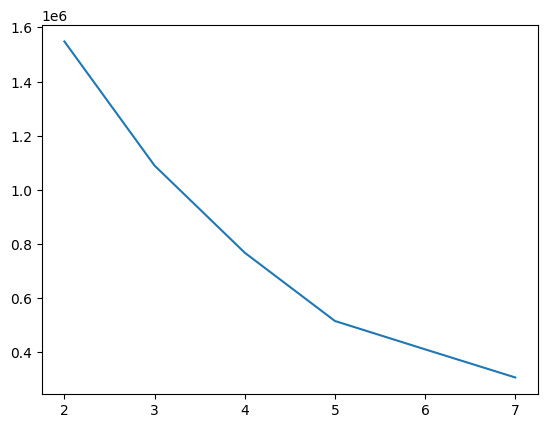

In [ ]:
plt.plot(clusters, ssd)

In [ ]:
final = KMeans(n_clusters= 5, max_iter= 150, random_state= 50)
model_clust.fit(df_df1.fillna(df_df1.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=7, random_state=42)

In [ ]:
cluster_labels = final.cluster_centers_

AttributeError: ignored